In [60]:
import torch
from torch import nn, optim
import torch_directml
import torchvision
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
print(torch.__version__)
print(torchvision.__version__)
if torch_directml.is_available():
    device = torch_directml.device()
else:
    device = torch.device("cpu")
print(device)



2.4.1+cpu
0.19.1+cpu
privateuseone:0


In [69]:
torch.cuda.is_available()

False

In [24]:
def train_vs_test_loss(train_losses, test_losses):
    # Create epoch arrays for proper plotting
    epochs = list(range(len(train_losses)))

    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, test_losses, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train vs Test Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
w = 0.7
b = 0.3
start = 0
end = 1
step = 0.02
x = torch.arange(start, end, step).unsqueeze(dim=1)
y = w * x + b
x[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
train_split = int(0.8 * len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

In [5]:
x_test, y_test, x_train, y_train

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]),
 tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
        

In [6]:
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    plt.legend(prop={"size": 14})

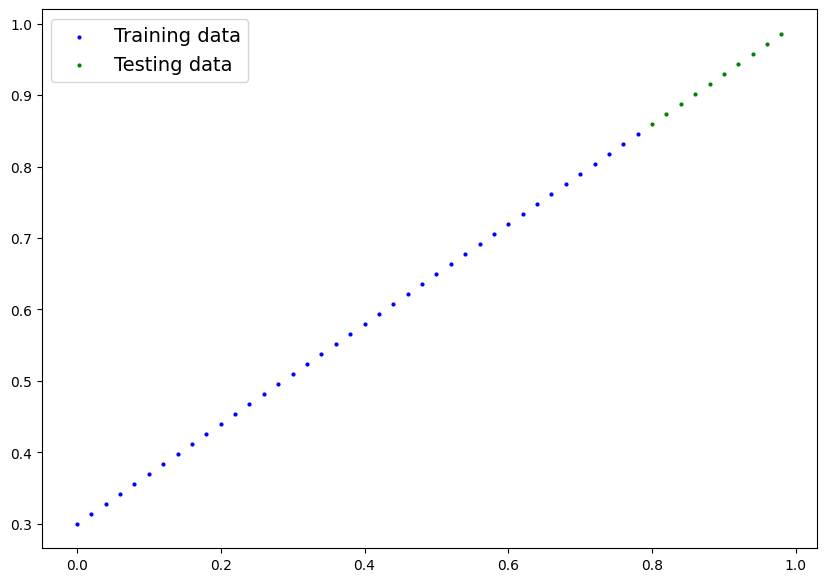

In [7]:
plot_predictions(x_train, y_train, x_test, y_test)

In [8]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.w = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.b = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.w * x + self.b

In [9]:
torch.manual_seed(42)
model = LinearRegressionModel()

with torch.inference_mode():
    y_preds = model(x_test)

y_preds, y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

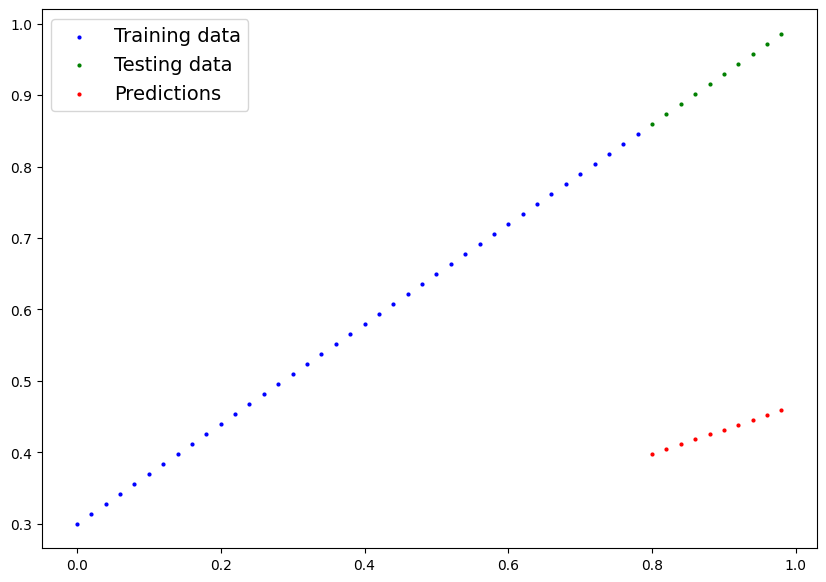

In [10]:
plot_predictions(predictions= y_preds)

In [11]:
loss_fn = nn.L1Loss()
optimizer = optim.SGD(params=model.parameters(), lr=0.01)
train_losses = []
test_losses = []

In [55]:
for epoch in range(10):
    # Training
    model.train()
    y_pred = model(x_train)
    loss = loss_fn(y_pred, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    train_losses.append(loss.item())
    
  
    model.eval()
    with torch.inference_mode():
        y_test_pred = model(x_test)
        test_loss = loss_fn(y_test_pred, y_test)
        test_losses.append(test_loss.item())
            
    print(f"Epoch: {epoch:3d} | Train Loss: {loss:.4f} | Test Loss: {test_loss:.4f} | W: {model.w.item():.4f} | B: {model.b.item():.4f}")

with torch.inference_mode():
    y_preds = model(x_test)
    test_loss = loss_fn(y_preds, y_test)
    print(f"Test loss: {test_loss}")






Epoch:   0 | Train Loss: 0.0039 | Test Loss: 0.0082 | W: 0.6826 | B: 0.3073
Epoch:   1 | Train Loss: 0.0035 | Test Loss: 0.0071 | W: 0.6844 | B: 0.3068
Epoch:   2 | Train Loss: 0.0032 | Test Loss: 0.0067 | W: 0.6860 | B: 0.3058
Epoch:   3 | Train Loss: 0.0028 | Test Loss: 0.0056 | W: 0.6878 | B: 0.3053
Epoch:   4 | Train Loss: 0.0025 | Test Loss: 0.0052 | W: 0.6894 | B: 0.3043
Epoch:   5 | Train Loss: 0.0021 | Test Loss: 0.0041 | W: 0.6912 | B: 0.3038
Epoch:   6 | Train Loss: 0.0018 | Test Loss: 0.0037 | W: 0.6927 | B: 0.3028
Epoch:   7 | Train Loss: 0.0015 | Test Loss: 0.0019 | W: 0.6947 | B: 0.3028
Epoch:   8 | Train Loss: 0.0012 | Test Loss: 0.0050 | W: 0.6951 | B: 0.2993
Epoch:   9 | Train Loss: 0.0026 | Test Loss: 0.0084 | W: 0.6990 | B: 0.3093
Test loss: 0.008447891101241112


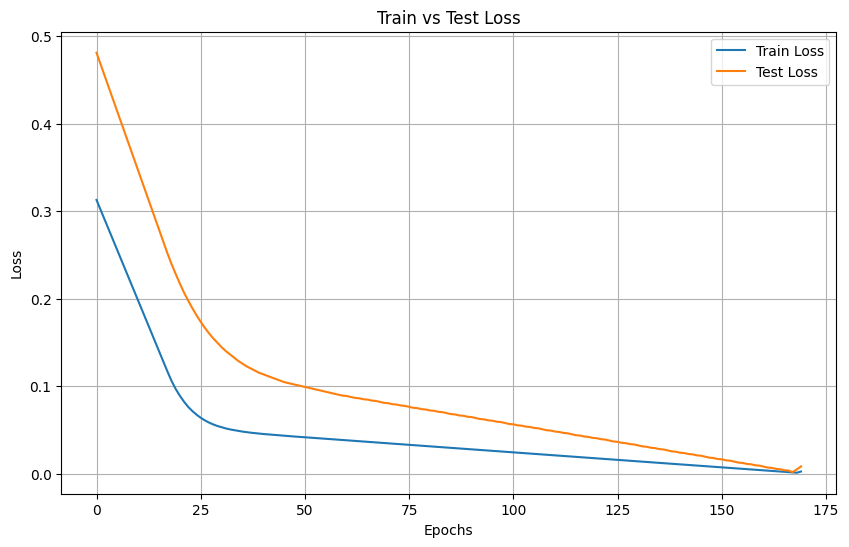

In [56]:
train_vs_test_loss(train_losses, test_losses)

In [57]:
len(train_losses)

170

In [13]:
model.eval()
with torch.inference_mode():
    y_preds = model(x_test)
    final_test_loss = loss_fn(y_preds, y_test)
    print(f"\nFinal Test Loss: {final_test_loss:.4f}")
    print(f"Target: W={w}, B={b}")
    print(f"Learned: W={model.w.item():.4f}, B={model.b.item():.4f}")


Final Test Loss: 0.3598
Target: W=0.7, B=0.3
Learned: W=0.3757, B=0.2288


In [67]:
class ModelPath():
    def __init__(self):
        self.MODEL_PATH = Path("models")
        self.MODEL_PATH.mkdir(parents=True, exist_ok=True)
        self.MODEL_NAME = "01_pytorch_linear_regression_model.pth"
        self.MODEL_SAVE_PATH = self.MODEL_PATH / self.MODEL_NAME
        self.MODEL_SAVE_PATH
    
    def load(self, model:torch.nn.Module):
        model.load_state_dict(torch.load(self.MODEL_SAVE_PATH))
        print(f"Model loaded from {self.MODEL_SAVE_PATH}")

    def save(self, model:torch.nn.Module):
        torch.save(model.state_dict(), self.MODEL_SAVE_PATH)
        print(f"Model saved to {self.MODEL_SAVE_PATH}")



def split_data(x, y, split_size=0.8):
    train_split = int(split_size * len(x))
    X_train, y_train = x[:train_split], y[:train_split]
    X_test, y_test = x[train_split:], y[train_split:]
    return X_train, y_train, X_test, y_test
    



In [65]:
model_path = ModelPath()
model_path.save(model)

Model saved to models\01_pytorch_linear_regression_model.pth


In [66]:
model_path.load(model)

Model loaded from models\01_pytorch_linear_regression_model.pth


C:\Users\Hp\AppData\Local\Temp\ipykernel_6892\3288921755.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(self.MODEL_SAVE_PATH))
